In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc3 as pm
import arviz as az

## Visual diagnostics

We will discuss:

* Trace plots
* Autocorrelation plots
* Rank plots

## Trace plots

<br>

    az.plot_trace(trace)


* MCMC samples should not be sensitive to the starting point (ergodicity)
    * So if you sample more than one chain (starting from different places) you should get the same result
* MCMC samples should have the lowest possible autocorrelation  
    * No long regions of monoticity

Trace plots can help diagnose:

* Multimodal posteriors
* Bad intialization
* Difficult topologies (such as Neal's funnel)

## Pathological traces

<br>

<center><img src="../img/pathological_traces.png" width=600></center>

## How to fix it

* More samples
* Burn-in
* Change the sampler!
* Reparametrize the model
* Read PyMC3 warning messages and suggestions!

## Autocorrelation plot

<br>

    az.plot_autocorr(trace)

* Ideally a sample should be independent and identically distributed (iid)

* By definition MCMC samples are correlated

* In practice, we want samples will low autocorrelation

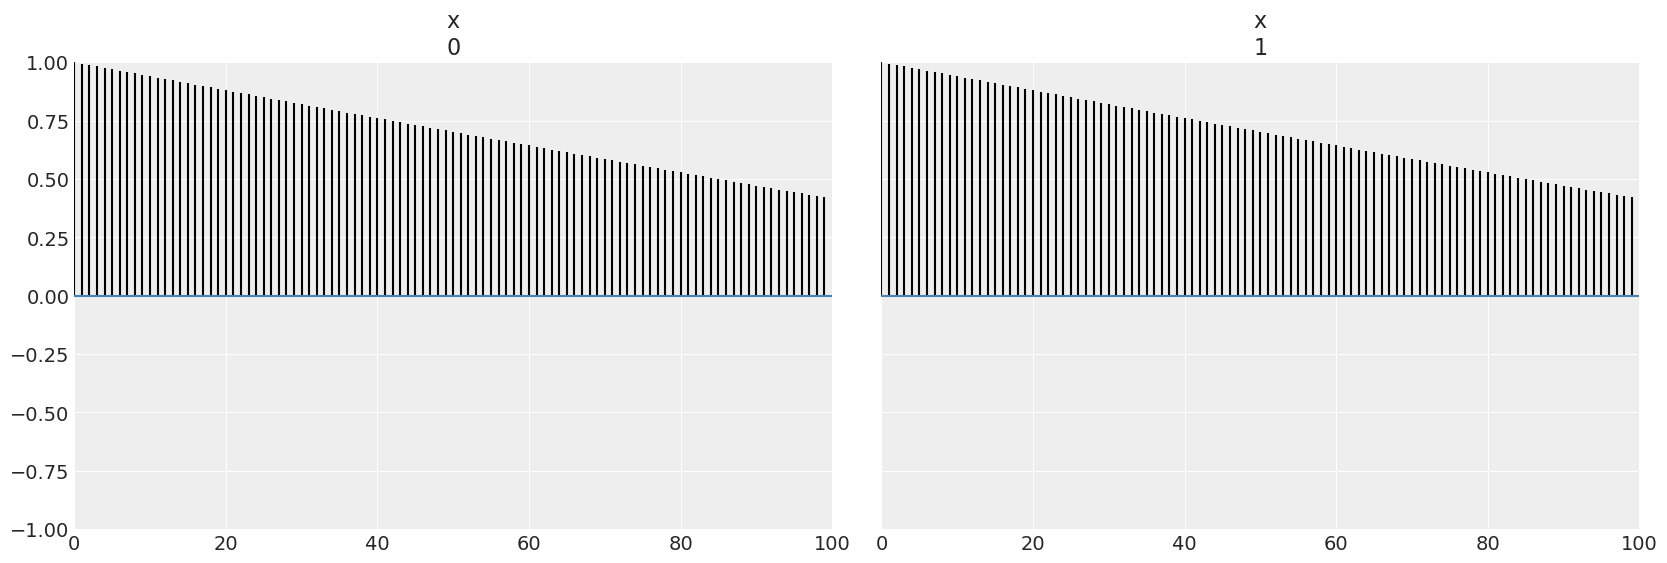

In [6]:
bad_chains = np.linspace(0, 1, 1000).reshape(2, -1)
az.plot_autocorr(bad_chains);

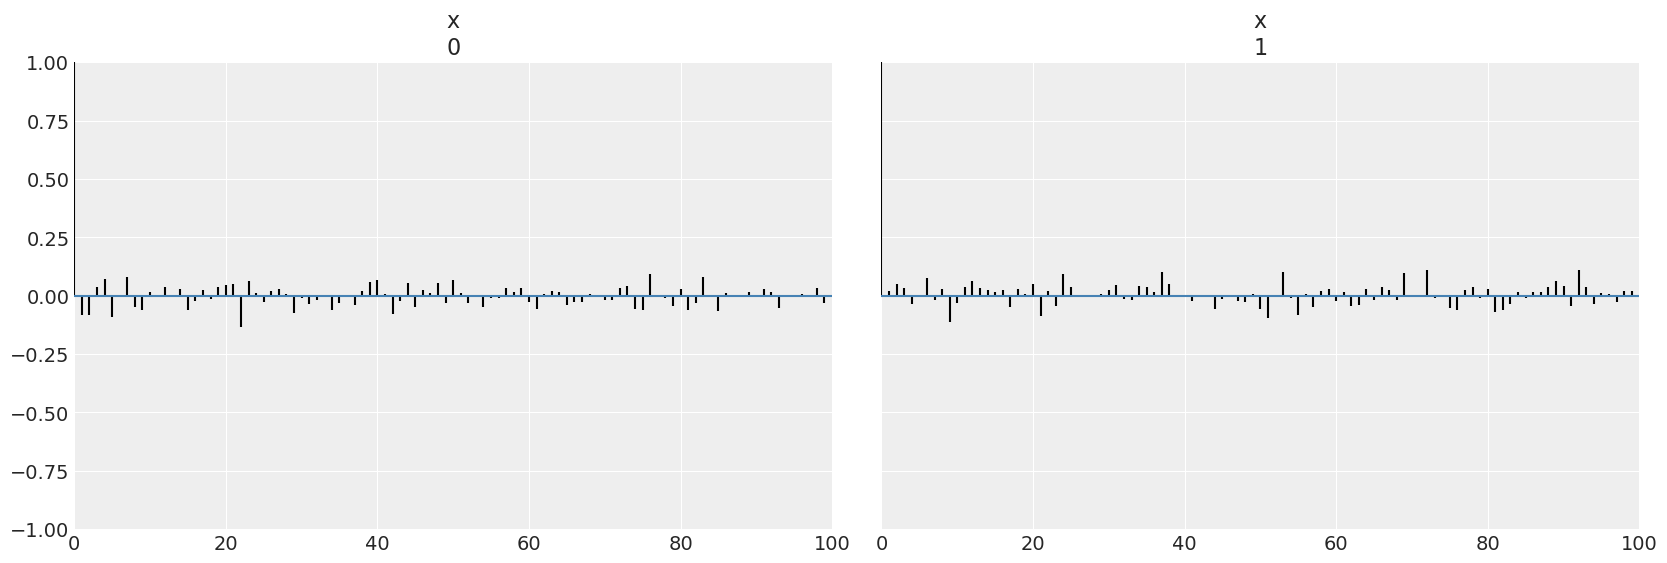

In [7]:
good_chains = stats.uniform.rvs(0, 1,size=(2,500))
az.plot_autocorr(good_chains);

## How to fix it

* More samples (this becomes less and less practicall as the autocorrelation increases)
* Reparametrize the model
* Follow PyMC3 warning messages and suggestions!

## Rank plot

<br>

    az.plot_rank()


* Rank plots are histograms of the ranked posterior draws (ranked over all chains) plotted separately for each chain.

* If all of the chains are targeting the same posterior, we expect the ranks in each chain to be uniform

* If rank plots of all chains look similar, this indicates good mixing of the chains


* Basically deviations from uniformity are signaling a chain that is not sampling all the regions properly


* This is a recently proposed visual test, author argue superiority over trace plots.



[Aki Vehtari et al](https://arxiv.org/abs/1903.08008)

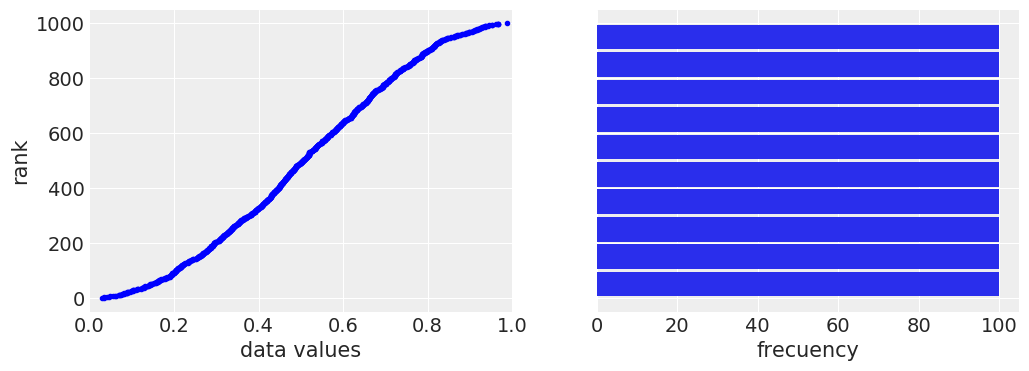

In [10]:
original_data = np.random.beta(2, 2, 1000)
ranked_data = stats.rankdata(original_data)

_, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
ax[0].plot(original_data, ranked_data, 'b.')
ax[0].set_xlabel('data values')
ax[0].set_ylabel('rank')
ax[0].set_xlim([0, 1])
ax[1].hist(ranked_data, bins=10, rwidth=0.9, orientation='horizontal')
ax[1].set_xlabel('frecuency');

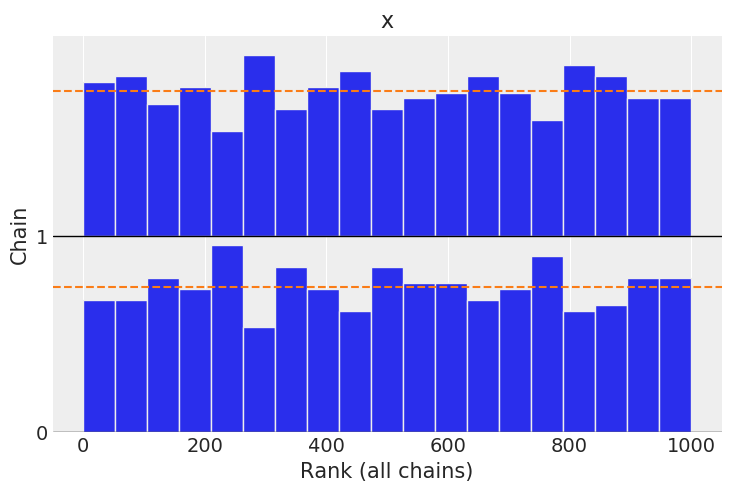

In [11]:
az.plot_rank(good_chains);

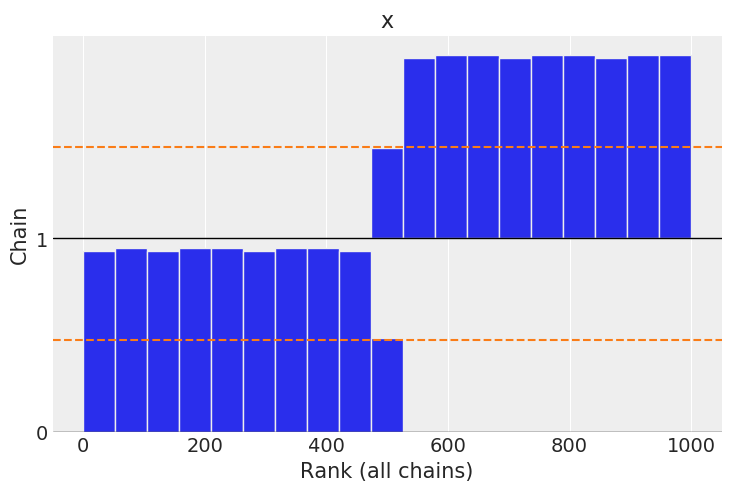

In [12]:
az.plot_rank(bad_chains);

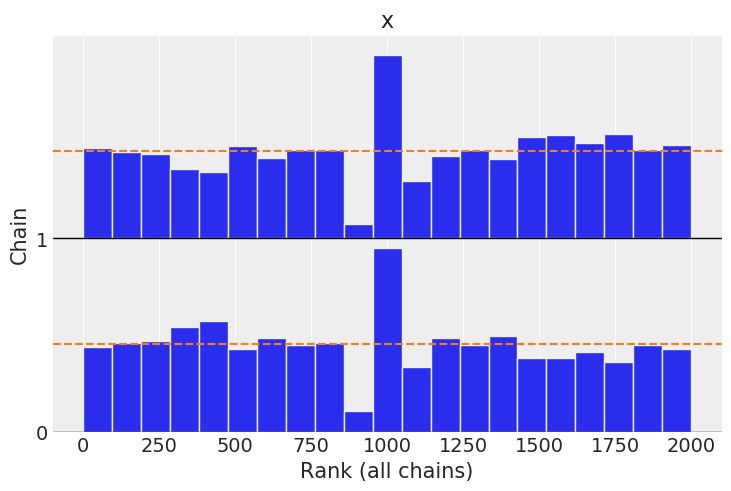

In [13]:
dada = np.random.normal(0, 1, (2, 1000))
dada[:,0:100] = 0
az.plot_rank(dada);